In [1]:
from core.mlp import MLP
from core.config import parse_config
import tensorflow as tf
import matplotlib.pyplot as plt

2023-04-07 15:59:24.999325: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 15:59:25.834209: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [32]:
def calculate_precision_recall(y_test, y_pred):

    TP = tf.math.count_nonzero(y_pred * y_test, dtype=tf.float32)
    TN = tf.math.count_nonzero((y_pred - 1) * (y_test - 1), dtype=tf.float32)
    FP = tf.math.count_nonzero(y_pred * (y_test - 1), dtype=tf.float32)
    FN = tf.math.count_nonzero((y_pred - 1) * y_test, dtype=tf.float32)
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    F1 = 2 * precision * recall / (precision + recall)
    accuracy = (TP + TN) / (TP + FN + TN + FP)

    return TP, TN, FP, FN, precision, recall, F1, accuracy

In [4]:
config = parse_config(config_name='config10')

mlp = MLP(config=config, name='config10')
mlp.train()

pred_y = mlp.model(mlp.x_test)
actual_y = mlp.y_test

2023-04-07 15:59:36.462575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 15:59:36.496935: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-07 15:59:36.497195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

step: 100, loss: 1.590210, accuracy: 0.921875
step: 200, loss: 1.533025, accuracy: 0.953125
step: 300, loss: 1.518027, accuracy: 0.976562
step: 400, loss: 1.528109, accuracy: 0.957031
step: 500, loss: 1.495864, accuracy: 0.980469
step: 600, loss: 1.492449, accuracy: 0.988281
step: 700, loss: 1.494046, accuracy: 0.984375
step: 800, loss: 1.493954, accuracy: 0.980469
step: 900, loss: 1.485371, accuracy: 0.988281
step: 1000, loss: 1.475551, accuracy: 0.996094
step: 1100, loss: 1.480918, accuracy: 0.992188
step: 1200, loss: 1.482100, accuracy: 0.988281
step: 1300, loss: 1.482944, accuracy: 0.980469
step: 1400, loss: 1.480759, accuracy: 0.988281
step: 1500, loss: 1.476547, accuracy: 0.992188
step: 1600, loss: 1.482563, accuracy: 0.984375
step: 1700, loss: 1.464882, accuracy: 1.000000
step: 1800, loss: 1.468767, accuracy: 1.000000
step: 1900, loss: 1.470381, accuracy: 1.000000
step: 2000, loss: 1.465164, accuracy: 1.000000
training completed
Test accuracy: 0.980000


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns

In [41]:
accuracy_score(actual_y, tf.argmax(pred_y, axis=1))

0.98

In [44]:
precision_score(actual_y, tf.argmax(pred_y, axis=1), average='weighted')

0.9800633238174823

In [45]:
recall_score(actual_y, tf.argmax(pred_y, axis=1), average='weighted')

0.98

In [46]:
f1_score(actual_y, tf.argmax(pred_y, axis=1), average='weighted')

0.9799979703723329

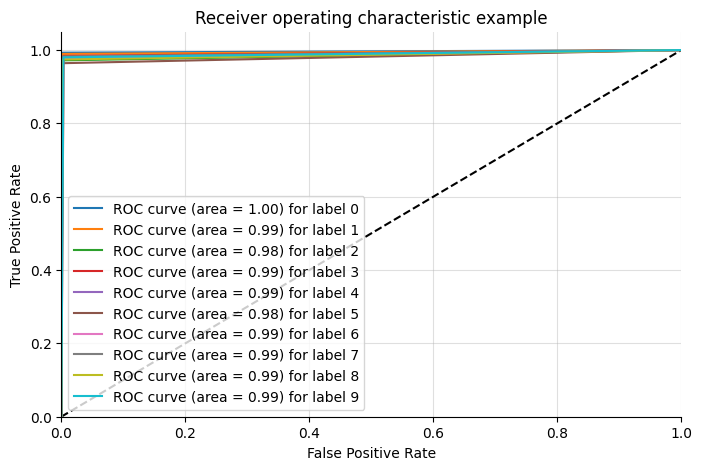

In [77]:
def plot_multiclass_roc(y_test, y_score, n_classes=10, figsize=(17, 6)):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(tf.one_hot(actual_y, depth=10), tf.one_hot(tf.argmax(pred_y, axis=1), depth=10), figsize=(8, 5))